# Movie Review Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
movies = pd.read_csv(r"E:\Vaishnavi\practiced\vs code\resume project\movie_review_analysis\IMDB_Dataset.csv")
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
movies['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
movies['sentiment'].replace("positive", 1, inplace = True)
movies['sentiment'].replace("negative", 0, inplace = True)
movies.head()

C:\Users\Avinash\AppData\Local\Temp\ipykernel_3828\1485999502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['sentiment'].replace("positive", 1, inplace = True)
C:\Users\Avinash\AppData\Local\Temp\ipykernel_3828\1485999502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
movies['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

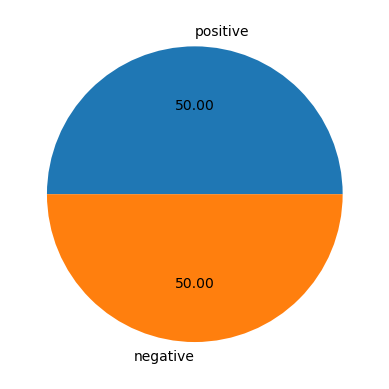

In [7]:
plt.pie(movies["sentiment"].value_counts(),labels = ["positive","negative"],autopct = "%0.2f")
plt.show()

In [8]:
movies["num_characters"] = movies["review"].apply(len)
movies["num_characters"]

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: num_characters, Length: 50000, dtype: int64

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
movies["num_words"] = movies["review"].apply(lambda x: len(nltk.word_tokenize(x)))
movies.head()

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,1,1761,380
1,A wonderful little production. <br /><br />The...,1,998,201
2,I thought this was a wonderful way to spend ti...,1,926,205
3,Basically there's a family where a little boy ...,0,748,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283


In [11]:
movies['num_sentences'] = movies['review'].apply(lambda x:len(nltk.sent_tokenize(x)))
movies['num_sentences']

0        10
1         7
2         4
3         6
4         9
         ..
49995     8
49996     3
49997     6
49998     8
49999     3
Name: num_sentences, Length: 50000, dtype: int64

In [12]:
movies[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,1309.431020,279.483480,10.741440
std,989.728014,207.949644,7.900587
min,32.000000,8.000000,1.000000
25%,699.000000,151.000000,6.000000
50%,970.000000,209.000000,9.000000
75%,1590.250000,340.000000,13.000000
max,13704.000000,2911.000000,282.000000


In [13]:
movies[movies['sentiment'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,25000.000000,25000.000000,25000.000000
mean,1294.064360,278.609120,11.026880
std,945.892669,201.294517,7.880229
min,32.000000,8.000000,1.000000
25%,706.000000,153.000000,6.000000
50%,973.000000,211.000000,9.000000
75%,1567.250000,338.000000,13.000000
max,8969.000000,1936.000000,118.000000


In [14]:
movies[movies['sentiment'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,25000.000000,25000.000000,25000.000000
mean,1324.797680,280.357840,10.456000
std,1031.492627,214.398757,7.910758
min,65.000000,11.000000,1.000000
25%,691.000000,148.000000,6.000000
50%,968.000000,207.000000,9.000000
75%,1614.000000,343.000000,13.000000
max,13704.000000,2911.000000,282.000000


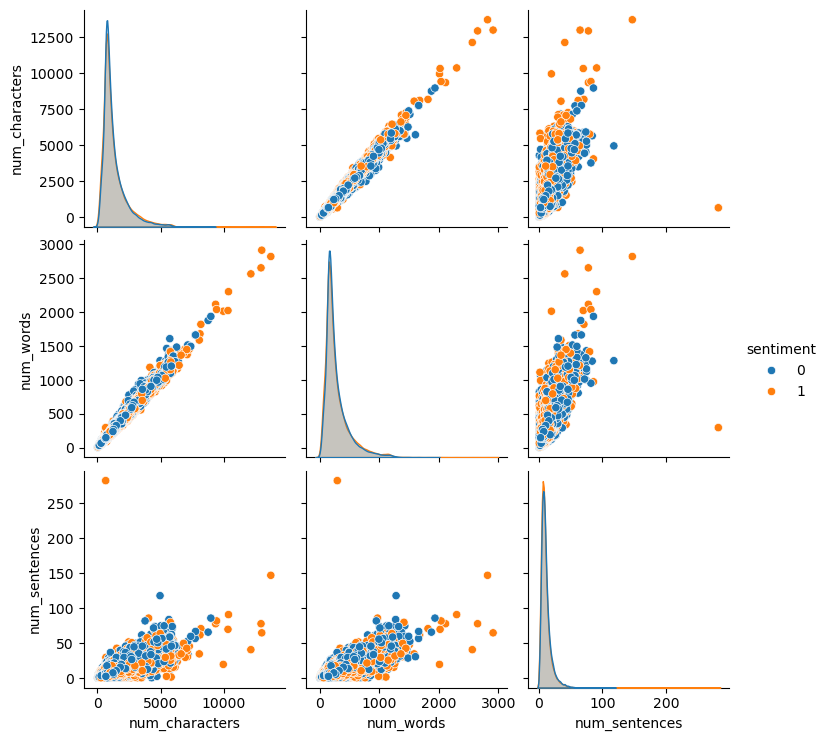

In [15]:
sns.pairplot(movies,hue='sentiment')

In [16]:
movies

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,1,1008,241,8
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,642,138,3
49997,I am a Catholic taught in parochial elementary...,0,1280,271,6
49998,I'm going to have to disagree with the previou...,0,1234,240,8


<Axes: >

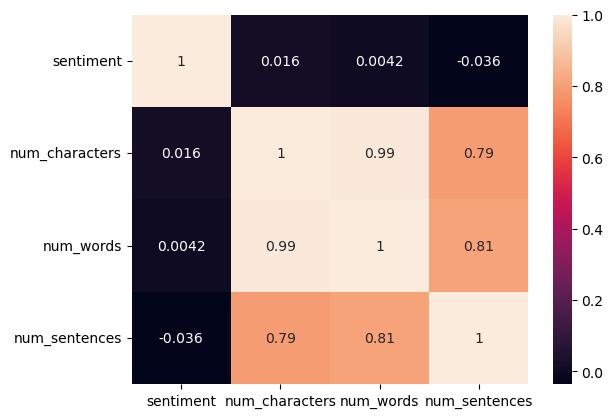

In [17]:
sns.heatmap(movies.select_dtypes(include = ['number']).corr(), annot = True)

Text Vectorization

In [18]:
# remove html tags

def remove_tags(sentence):
    clean_sentence = re.sub(r'<.*?>', '', sentence)
    return clean_sentence

movies['review'] = movies['review'].apply(remove_tags)
movies['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [19]:
# remove all special characters

def remove_special_character(sentence):
    
    pattern = r'[^a-zA-Z0-9\s]'                     # defining a pattern i.e. not a number,letter, whitespace to match 
    clean_sentence = re.sub(pattern, '', sentence)
    return clean_sentence

movies['review'] = movies['review'].apply(remove_special_character)
movies['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [20]:
# convert all sentence in lowercase

def lower(sentence):
    return sentence.lower()

movies['review'] = movies['review'].apply(lower)
movies['review'][1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [21]:
movies['review'].apply(type).value_counts()

review
<class 'str'>    50000
Name: count, dtype: int64

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avinash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# remove stopword to reduce noise

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))                 # get stopwords from english language(ex. is, and, a, very, of)
    words = word_tokenize(text)
    filtered_words = [w for w in words if w not in stop_words]
    return ' '.join(filtered_words)
movies['review'] = movies['review'].apply(remove_stopwords)
movies['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [24]:
# stem the words(remove suffix)

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def preprocessed_text(text):
    result = [stemmer.stem(word) for word in text]
    return ''.join(result)
movies['review'] = movies['review'].apply(preprocessed_text)
movies['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [25]:
#!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [26]:
positive_wc = wc.generate(movies[movies['sentiment'] == 1]['review'].str.cat(sep=" "))

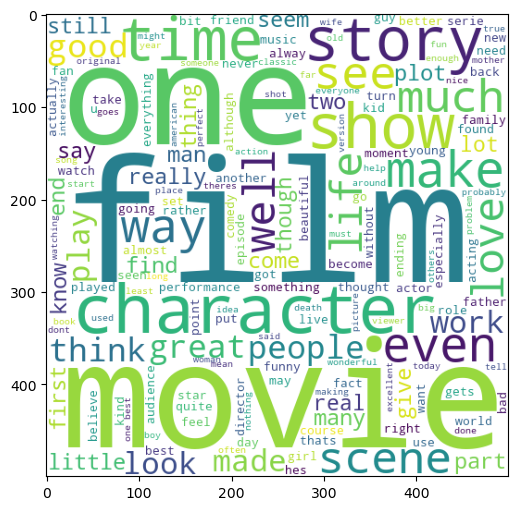

In [27]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [28]:
negative_wc = wc.generate(movies[movies['sentiment'] == 0]['review'].str.cat(sep=" "))

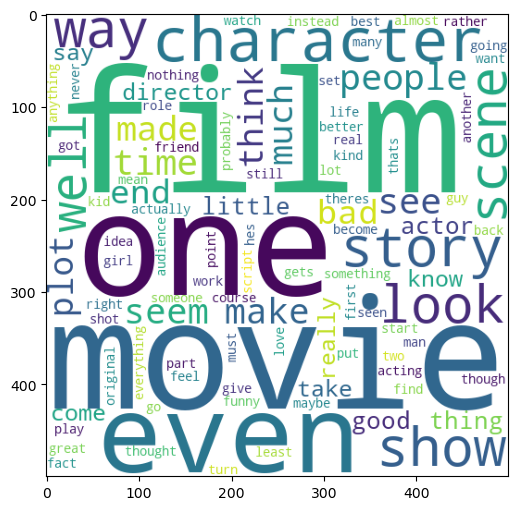

In [29]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [30]:
positive_review_corpus = []

for msg in movies[movies['sentiment'] == 1]['review'].tolist():
    for word in msg.split():
        positive_review_corpus.append(word)

In [31]:
len(positive_review_corpus)

3026767

In [32]:
negative_review_corpus = []

for msg in movies[movies['sentiment'] == 1]['review'].tolist():
    for word in msg.split():
        negative_review_corpus.append(word)

In [33]:
len(negative_review_corpus)

3026767

# Model Building

In [34]:
X = np.array(movies.iloc[:,0].values)
y = np.array(movies.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(movies.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [35]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(train_x.shape,train_y.shape))
print("Test shapes : X = {}, y = {}".format(test_x.shape,test_y.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


In [36]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
bnb.fit(train_x,train_y)


BernoulliNB()

In [37]:
y_pred_gnb = gnb.predict(test_x)
y_pred_mnb = mnb.predict(test_x)
y_pred_bnb = bnb.predict(test_x)

print("Gaussian = ",accuracy_score(test_y, y_pred_gnb))
print("Multinomial = ",accuracy_score(test_y, y_pred_mnb))
print("Bernoulli = ",accuracy_score(test_y, y_pred_bnb))

Gaussian =  0.8121
Multinomial =  0.8292
Bernoulli =  0.8245


In [38]:
print("Gaussian = ",precision_score(test_y,y_pred_gnb))
print("Multinomial = ",precision_score(test_y,y_pred_mnb))
print("Bernoulli = ",precision_score(test_y,y_pred_bnb))

Gaussian =  0.8183312782572956
Multinomial =  0.8256624825662483
Bernoulli =  0.8055766312594841


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#!pip install xgboost

In [40]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [45]:
algorithm = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [46]:
def train_classifier(algo,train_x,train_y,test_x,test_y):
    algo.fit(train_x,train_y)
    y_pred = algo.predict(test_x)
    accuracy = accuracy_score(test_y,y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy, precision

In [47]:
accuracy = []
precision = []

for name,algo in algorithm.items():
    
    current_accuracy,current_precision = train_classifier(algo, train_x,train_y,test_x,test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy.append(current_accuracy)
    precision.append(current_precision)

For  SVC
Accuracy -  0.551
Precision -  0.5487292375425256
For  KN
Accuracy -  0.655
Precision -  0.6293410130442149
For  NB
Accuracy -  0.8292
Precision -  0.8256624825662483
For  DT
Accuracy -  0.6918
Precision -  0.6381799620825434
For  LR
Accuracy -  0.8589
Precision -  0.8526503164556962
For  RF
Accuracy -  0.8187
Precision -  0.8248459958932238


c:\Users\Avinash\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.8022
Precision -  0.7792885081020674
For  BgC
Accuracy -  0.7935
Precision -  0.7919005613472334
For  ETC
Accuracy -  0.8256
Precision -  0.8369814467375443
For  GBDT
Accuracy -  0.7786
Precision -  0.7406375195958892
For  xgb
Accuracy -  0.8339
Precision -  0.8173813169984686


In [49]:
performance_movies = pd.DataFrame({'Algorithm':algorithm.keys(),'Accuracy':accuracy,'Precision':precision}).sort_values('Precision',ascending=False)

In [50]:
performance_movies.head()

,Algorithm,Accuracy,Precision
4,LR,0.8589,0.852650
8,ETC,0.8256,0.836981
2,NB,0.8292,0.825662
5,RF,0.8187,0.824846
10,xgb,0.8339,0.817381


In [51]:
performance_movies1 = pd.melt(performance_movies, id_vars = "Algorithm")

In [52]:
performance_movies1.head()

,Algorithm,variable,value
0,LR,Accuracy,0.8589
1,ETC,Accuracy,0.8256
2,NB,Accuracy,0.8292
3,RF,Accuracy,0.8187
4,xgb,Accuracy,0.8339


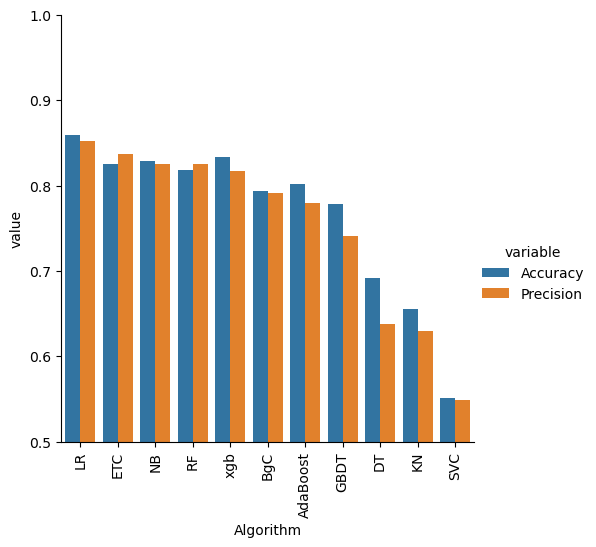

In [53]:
sns.catplot(data = performance_movies1, x = 'Algorithm', y='value', hue = 'variable', kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(train_x,train_y)

In [ ]:
y_pred = voting.predict(test_x)
print("Accuracy",accuracy_score(test_y,y_pred))
print("Precision",precision_score(test_y,y_pred))

Even if the logistic regreesion have more accuracy and precision. As the Multinomila Naive Bayes is fast and simple, works well with text, interpretable and less likely to overfit. It also is good in ensamble method. Hence MultinomiaNB finalised for main model.

In [ ]:
import pickle
pickle.dump(voting,open('model1.pkl','wb'))

In [ ]:
mnb.fit(train_x,train_y)
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))